In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# cd /content/drive/MyDrive/My_Projects/app

/content/drive/MyDrive/My_Projects/app


In [1]:
%tensorflow_version 1.x

UsageError: Line magic function `%tensorflow_version` not found.


In [2]:
import tensorflow
print(tensorflow.__version__)

2.9.1


#Data Preprocessing

In [5]:
import cv2,os
data_path='F:\IMP DOCUMENT\projects\ISRO\ISRO-Summer-Internship\Project101\Vehicle'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels)) #empty dictionary
print(label_dict)
print(categories)
print(labels)

{'Auto': 0, 'Bus': 1, 'Car': 2, 'Tempo': 3, 'Tractor': 4, 'Truck': 5}
['Auto', 'Bus', 'Car', 'Tempo', 'Tractor', 'Truck']
[0, 1, 2, 3, 4, 5]


In [6]:
img_size=100
data=[]
target=[]

for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)

        try:  
            resized=cv2.resize(img,(img_size,img_size))
            #resizing the image  into 100x100, since we need a fixed common size for all the images in the dataset
            data.append(resized)
            target.append(label_dict[category])
            #appending the image and the label(categorized) into the list (dataset)
        except Exception as e:
            print('Exception:',e)
            #if any exception rasied, the exception will be printed here. And pass to the next image

#Recale and assign  catagorical lables

In [7]:
import numpy as np
data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,3))
target=np.array(target)
from keras.utils import np_utils
new_target=np_utils.to_categorical(target)

In [8]:
new_target.shape

(1232, 6)

#CNN Model

In [9]:
data.shape

(1232, 100, 100, 3)

In [17]:
data.shape[1:]

(100, 100, 3)

In [18]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(50,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(6,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 98, 98, 200)       5600      
                                                                 
 activation_2 (Activation)   (None, 98, 98, 200)       0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 49, 49, 200)      0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 47, 47, 100)       180100    
                                                                 
 activation_3 (Activation)   (None, 47, 47, 100)       0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 23, 23, 100)      0         
 2D)                                                  

#Splittiong data into traning and testing

In [20]:
from sklearn.model_selection import train_test_split
train_data,test_data,train_target,test_target=train_test_split(data,new_target,test_size=0.1)

In [21]:
train_data.shape

(1108, 100, 100, 3)

In [22]:
train_target.shape

(1108, 6)

In [23]:
#checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=200,validation_split=0.2)

Epoch 1/200
28/28 [==============================] - 34s 1s/step - loss: 1.8021 - accuracy: 0.2122 - val_loss: 1.7266 - val_accuracy: 0.2297
Epoch 2/200
28/28 [==============================] - 37s 1s/step - loss: 1.7467 - accuracy: 0.2472 - val_loss: 1.7036 - val_accuracy: 0.2703
Epoch 3/200
28/28 [==============================] - 42s 1s/step - loss: 1.7279 - accuracy: 0.2585 - val_loss: 1.6592 - val_accuracy: 0.2523
Epoch 4/200
28/28 [==============================] - 41s 1s/step - loss: 1.6321 - accuracy: 0.3093 - val_loss: 1.5625 - val_accuracy: 0.2928
Epoch 5/200
28/28 [==============================] - 41s 1s/step - loss: 1.4758 - accuracy: 0.4052 - val_loss: 1.5789 - val_accuracy: 0.2703
Epoch 6/200
28/28 [==============================] - 41s 1s/step - loss: 1.3337 - accuracy: 0.4740 - val_loss: 1.5175 - val_accuracy: 0.3153
Epoch 7/200
28/28 [==============================] - 41s 1s/step - loss: 1.1654 - accuracy: 0.5169 - val_loss: 1.6521 - val_accuracy: 0.3288
Epoch 8/200
2

In [24]:
model.save('model.h5') 

In [25]:
from matplotlib import pyplot as plt

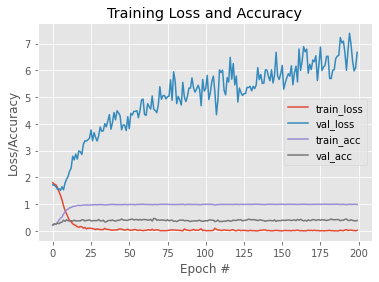

In [26]:
# plot the training loss and accuracy
N = 200
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="center right")
plt.savefig("CNN_Model")